## MMSB: Cocktails II

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import eigen
import mmsb
import utils

pd.options.display.max_columns = 30

%matplotlib inline
matplotlib.style.use('ggplot')

from IPython.core.debugger import Tracer
tracer = Tracer()

import warnings
warnings.filterwarnings('error')

In [2]:
data = pd.read_csv('../data/all_our_ideas/10009/dat.csv', header=None)
text = pd.read_csv('../data/all_our_ideas/10009/text_map.csv', header=None)[1]
data.head()

,0,1,2,3
0,2,3,0,ed3a85e9bde09ca42fb6e212c579694d
1,1,4,0,ed3a85e9bde09ca42fb6e212c579694d
2,3,8,1,ed3a85e9bde09ca42fb6e212c579694d
3,0,1,0,ed3a85e9bde09ca42fb6e212c579694d
4,1,4,0,ed3a85e9bde09ca42fb6e212c579694d


In [3]:
X = data[[0,1,2]].values
X.shape

(437, 3)

In [4]:
max(X[:,1]) # V

9

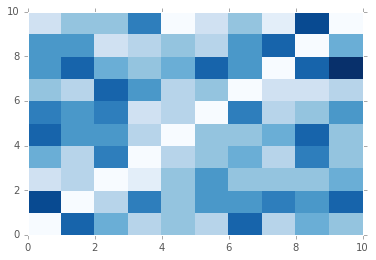

In [5]:
R = utils.get_interactions(X)
plt.pcolor(pd.DataFrame(R), cmap='Blues')

## PrefRank

In [6]:
R_nrm = eigen.get_R_nrm(R)
eigen.power_method(R_nrm)

6    0.132115
8    0.127460
9    0.126702
2    0.125454
0    0.108314
1    0.095121
5    0.083599
3    0.079880
7    0.065868
4    0.055487
dtype: float64

In [14]:
pd.DataFrame([eigen.power_method(R_nrm), text], index=['rank', 'text']).T.sort_values('rank', ascending=False)

,rank,text
6,0.132115,Long Island Iced Tea
8,0.12746,Gin and Tonic
9,0.126702,Margarita
2,0.125454,Dark and Stormy
0,0.108314,Old Fashioned
1,0.0951213,Whisky Sour
5,0.0835995,Cosmopolitan
3,0.0798801,Manhattan
7,0.0658681,Martini
4,0.0554869,Screaming Orgasm


## Prototype

0:00:00.883108


(-323.79869269188464, -323.79869269188464)

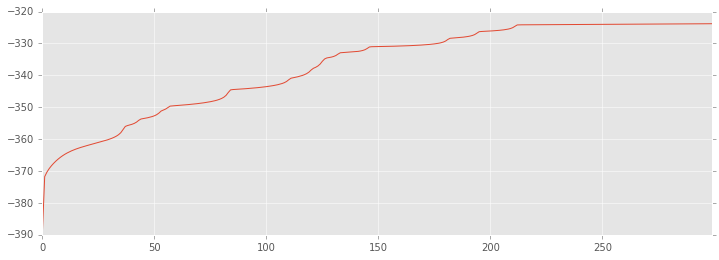

In [15]:
K = 3
gamma, phi_pq, phi_qp, B, elbos = mmsb.train_mmsb(X, K, n_iter=300)
pd.Series(elbos).plot(figsize=[12,4])
max(elbos), elbos[-1]

In [16]:
pd.DataFrame(gamma).idxmax().value_counts()

2    4
0    4
1    2
dtype: int64

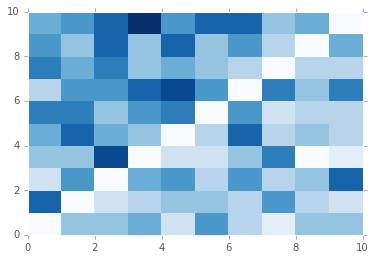

In [20]:
ptypes = pd.DataFrame(gamma).idxmax().sort_values().index
plt.pcolor(pd.DataFrame(R).ix[ptypes][ptypes], cmap='Blues')

### B (interaction probabilities)

In [21]:
pd.DataFrame(B).round(3)

,0,1,2
0,0.500,0.402,0.362
1,0.598,0.500,0.339
2,0.638,0.661,0.500


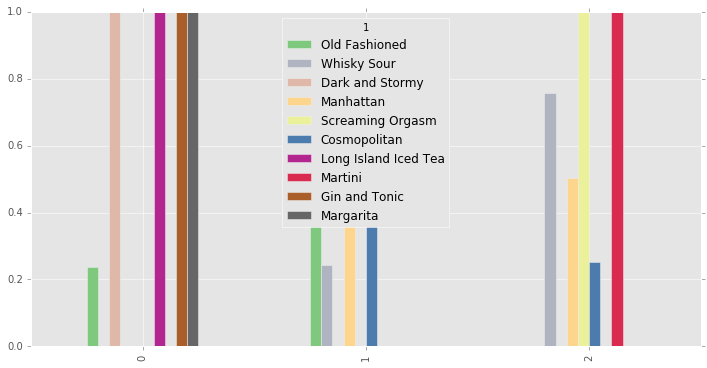

In [22]:
gamma_df = pd.DataFrame(gamma.T, index=text.apply(lambda x: x[:30]))
gamma_df.iloc[:10].T.plot(kind='bar', cmap='Accent', figsize=[12,6])

In [23]:
gamma_df = pd.DataFrame(gamma.T, index=text.apply(lambda x: x[:50]))

def show_prototypes(ptype):
    return gamma_df[ptype][gamma_df[ptype] > .5].sort_values(ascending=False)

In [24]:
show_prototypes(0)

1
Gin and Tonic           0.997923
Long Island Iced Tea    0.997655
Margarita               0.997569
Dark and Stormy         0.997509
Name: 0, dtype: float64

In [25]:
show_prototypes(1)

1
Old Fashioned    0.762569
Cosmopolitan     0.747098
Name: 1, dtype: float64

In [26]:
show_prototypes(2)

1
Martini             0.997923
Screaming Orgasm    0.997445
Whisky Sour         0.756930
Manhattan           0.503712
Name: 2, dtype: float64